In [1]:
import subprocess
import gzip
import json
import pandas as pd
import os
import pickle as pkl
import nltk
from nltk.corpus import stopwords
from collections import Counter 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/nobackup/racball/github/beliefnet/notebooks/20220723_ZeroShot/data/testdata-taskA-all-annotations.txt",sep="\t")
texts = set(df.Tweet)
df = pd.read_parquet("/nobackup/racball/github/beliefnet/notebooks/20220723_ZeroShot/data/preprocessed/test_preprocessed_taskA.parquet")

In [6]:
df

,Tweet,Stance,Index,Original Tweet,Target
0,he who exalts himself shall be humbled and he ...,AGAINST,10001,He who exalts himself shall be humbled; a...,Atheism
1,rt prayer bullets i remove nehushtan previous ...,AGAINST,10002,RT @prayerbullets: I remove Nehushtan -previou...,Atheism
2,brain man 365 heid tj j benjamin lives i have ...,AGAINST,10003,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism
3,# god # is utterly powerless without human int...,AGAINST,10004,#God is utterly powerless without Human interv...,Atheism
4,david cameron miracles of # multiculturalism #...,AGAINST,10005,@David_Cameron Miracles of #Multiculturalism...,Atheism
...,...,...,...,...,...
1244,metal head monty tom six i followed him before...,NONE,11245,@MetalheadMonty @tom_six I followed him before...,Legalization of Abortion
1245,"for he who avenges blood remembers , he does n...",AGAINST,11246,"For he who avenges blood remembers, he does no...",Legalization of Abortion
1246,life is sacred on all levels abortion does not...,AGAINST,11247,Life is sacred on all levels. Abortion does no...,Legalization of Abortion
1247,raven symone you refer to we which you a minor...,AGAINST,11248,"@ravensymone U refer to ""WE"" which =""YOU"" & a ...",Legalization of Abortion


In [22]:
set(df.Tweet.to_list()[0].split()) - set(stopwords.words('english'))

{'#SemST',
 '23:12.',
 'He',
 'exalted.Matt',
 'exalts',
 'humbled;',
 'humbles',
 'shall'}

In [27]:
df['Tweet_without_stopwords'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (set(stopwords.words('english')))]))

In [28]:
set(df.Tweet_without_stopwords.to_list()[0].split())

{'#SemST',
 '23:12.',
 'He',
 'exalted.Matt',
 'exalts',
 'humbled;',
 'humbles',
 'shall'}

In [60]:
for i in range(start,finish):
    label = str(i).zfill(5)
    print(label)
    # subprocess.run(["git", "lfs", "pull", "--include", f"en/c4-train.{label}-of-01024.json.gz"])
    jsonfilename = f'../en/c4-train.{label}-of-01024.json.gz'
    with gzip.open(jsonfilename, 'r') as fin:
        data = [json.loads(line)['text'] for line in fin]

    print(texts.intersection(data))
    # subprocess.run(["rm", "-rf", f"../en/c4-train.{label}-of-01024.json.gz"])

    if i == 5:
        break

00000
set()
00001
set()
00002
set()
00003
set()
00004
set()
00005
set()


In [33]:
start = 0
finish = 1
for i in range(start,finish):
    try:
        label = str(i).zfill(5)
        print(label)
        # subprocess.run(["git", "lfs", "pull", "--include", f"en/c4-train.{label}-of-01024.json.gz"])
        jsonfilename = f'/data2/sg/racball/c4/en/c4-train.{label}-of-01024.json.gz'
        with gzip.open(jsonfilename, 'r') as fin:
            data = [json.loads(line)['text'] for line in fin]

        texts.intersection(data)
        # subprocess.run(["rm", "-rf", f"en/c4-train.{label}-of-01024.json.gz"])

    except FileNotFoundError:
        continue

00000


NameError: name 'texts' is not defined

In [23]:
with gzip.open(jsonfilename, 'r') as fin:
   data = [i for line in fin for i in json.loads(line)['text'].split() if i not in stopwords.words('english')]

KeyboardInterrupt: 

In [44]:
data_ = [j for i in data[:3] for j in i.split() if j not in stopwords.words('english')]

AttributeError: 'int' object has no attribute 'split'

In [52]:
data_ = [set(i.split()) - set(stopwords.words('english')) for i in data]

In [54]:
data_[0]

[{'$35',
  '22nd',
  'BBQ',
  'BBQ?',
  'Balay',
  'Beginners',
  'Champion,',
  'Class',
  'Do',
  'He',
  'Included',
  'KCBS',
  'Lonestar',
  'Missoula!',
  'Place',
  'Rangers.',
  'September',
  'Smoke',
  'Taking',
  'The',
  'Thursday,',
  'Tony',
  'World',
  'You',
  'apron',
  'beginner',
  'better',
  'calendar',
  'class',
  'compete',
  'competition,',
  'cost',
  'culinary',
  'delicious',
  'either',
  'everyone',
  'everything',
  'fire',
  'free.',
  'get',
  'including',
  'information.',
  'join',
  'know',
  'level',
  'making',
  'meat',
  'need',
  'now.',
  'opportunity,',
  'per',
  'person,',
  'plus',
  'prepared.',
  'put',
  'recipes,',
  'samples',
  'selection',
  'skills.',
  'smoker',
  'spectators',
  't-shirt',
  'tasting',
  'teach',
  'teaching',
  'techniques,',
  'timelines,',
  'trimming,',
  'want',
  'wants'},
 {'"Not',
  '"file',
  "'Mac",
  "(10.7)'",
  '(booting',
  '(if',
  '(or',
  "(that's",
  '20,',
  '2012.',
  '240gb',
  '4',
  '500gb'

In [51]:
data_ = [[j for j in i.split() if j not in stopwords.words('english')] for i in data]

KeyboardInterrupt: 

In [10]:
df = pd.DataFrame()
df = pd.read_parquet(f"../data/raw_tweets_testA.parquet")

In [11]:
df

,id,intersection
0,750,[]
1,751,[]
2,752,[]
3,753,[]
4,754,[]
...,...,...
1019,1019,[]
1020,1020,[]
1021,1021,[]
1022,1022,[]


In [5]:
df = pd.DataFrame()
for file in os.listdir("../data_temp"):
    df_temp = pd.read_parquet(f"../data_temp/{file}")
    df = pd.concat([df,df_temp],ignore_index=True)

# df.to_parquet("../data/raw_tweets_taskB.parquet")

# [i for i in df.intersection.to_list() if len(i)!=0]

In [6]:
df

,id,true,false,positive,negative,favor,against,entails,contradicts
0,0,2,0,698,297,38,956,2,0
1,1,0,0,565,226,41,883,0,1
2,2,0,0,589,277,49,895,2,0
3,3,0,0,477,269,38,923,1,0
4,4,1,0,535,248,50,1075,1,2
...,...,...,...,...,...,...,...,...,...
995,995,0,0,554,273,43,991,9,3
996,996,0,0,510,276,50,822,1,0
997,997,0,0,520,296,66,920,3,0
998,998,1,0,585,291,52,995,2,2


In [7]:
df = pd.DataFrame()
for file in os.listdir("../data/unigrams/"):
    df_temp = pd.read_parquet(f"../data/unigrams/{file}")
    df = pd.concat([df,df_temp],ignore_index=True)

# df.to_parquet("../data/raw_tweets_taskB.parquet")

# [i for i in df.intersection.to_list() if len(i)!=0]

In [8]:
df

,id,true,false,positive,negative,favor,against,entails,contradicts,True,False,Positive,Negative,Favor,Against,Entails,Contradicts
0,0,14967,3133,13531,7252,13531,7252,455,108,2,0,698,297,38,956,2,0
1,1,15098,2892,12848,6953,12848,6953,418,130,0,0,565,226,41,883,0,1
2,2,15165,2870,13298,6847,13298,6847,434,105,0,0,589,277,49,895,2,0
3,3,14981,2816,12994,6862,12994,6862,421,142,0,0,477,269,38,923,1,0
4,4,15302,2699,12834,6984,12834,6984,410,120,1,0,535,248,50,1075,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,995,14757,2854,12789,6868,12789,6868,418,127,0,0,554,273,43,991,9,3
946,996,14903,2853,12991,6816,12991,6816,420,105,0,0,510,276,50,822,1,0
947,997,15242,2848,12893,6687,12893,6687,445,132,0,0,520,296,66,920,3,0
948,998,15269,2900,13051,7062,13051,7062,408,128,1,0,585,291,52,995,2,2


In [2]:
df = pd.DataFrame()
for file in os.listdir("../data"):
    if "chunk" in file:
        df_temp = pd.read_parquet(f"../data/{file}")
        df = pd.concat([df,df_temp],ignore_index=True)
# df.to_parquet("../data/verbatim_preprocessed_tweets_taskA.parquet")

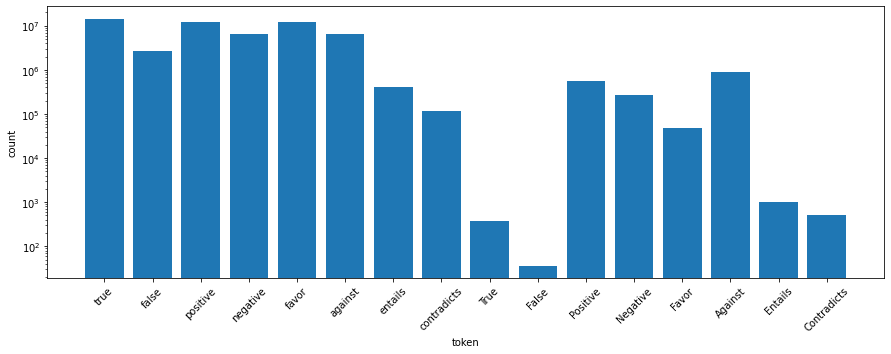

In [23]:
d = dict(df.drop('id',axis=1).sum())

plt.bar(d.keys(),d.values())
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('token')
_ = plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = (15,5)


In [ ]:
d = dict(df.drop('id',axis=1).sum())

plt.bar(['true','false','positive','negative','favor','against','entails','contradicts'],
d['true'] + d['True'],)
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('token')
_ = plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = (15,5)


In [8]:
[i for i in df.intersection.to_list() if len(i)!=0]

[]

In [24]:
start = 0
finish = 1
for i in range(start,finish):
    try:
        label = str(i).zfill(5)
        print(label)
        # subprocess.run(["git", "lfs", "pull", "--include", f"en/c4-train.{label}-of-01024.json.gz"])
        jsonfilename = f'/data2/sg/racball/c4/en/c4-train.{label}-of-01024.json.gz'
        with gzip.open(jsonfilename, 'r') as fin:
            data = [json.loads(line)['text'] for line in fin]

        data_ = [i.split() for i in data]
        data_ = [item for sublist in data_ for item in sublist]


        # subprocess.run(["rm", "-rf", f"en/c4-train.{label}-of-01024.json.gz"])

    except FileNotFoundError:
        continue

00000


In [27]:
d = Counter(data_)

In [39]:
with open ("coun.pkl", "wb") as f:
    pkl.dump(d,f)

In [28]:
d["True"]

1545

In [40]:
d["favor"], d["against"], d["false"], d["true"], d["entails"], d["contradicts"]

(2475, 38506, 3133, 14967, 455, 108)

# bigrams

In [4]:
for i in range(0,2):
    label = str(i).zfill(5)
    print(label)
    jsonfilename = f'../en/c4-train.{label}-of-01024.json.gz'
    with gzip.open(jsonfilename, 'r') as fin:
        data = [json.loads(line)['text'] for line in fin]

    break
    if i == 5:
        break

00000


FileNotFoundError: [Errno 2] No such file or directory: '../en/c4-train.00000-of-01024.json.gz'